In [1]:
%store -r gif_imageio_master_call_sequences
%store -r gify_master_call_sequences
%store -r imageio_sketch_master_call_sequences
%store -r stylenerf_main_call_sequences

import utils.utils as utils

gif_imageio_master_call_sequences = gif_imageio_master_call_sequences
gify_master_call_sequences = gify_master_call_sequences
imageio_sketch_master_call_sequences = imageio_sketch_master_call_sequences
stylenerf_main_call_sequences = stylenerf_main_call_sequences

call_sequences = gif_imageio_master_call_sequences + gify_master_call_sequences + imageio_sketch_master_call_sequences + stylenerf_main_call_sequences

### 3. Usage Patterns

In [2]:
method_invocations = []

#get list of all method invocations
for call_sequence in call_sequences:
    for method in call_sequence:
        if(method not in method_invocations):
            method_invocations.append(method)

#save method invocationss as defined MethodCall class into new list
method_invocations_processed = []
for method in method_invocations:
    x = ""
    try:
        x = (method.func.value.value + "." + method.func.attr.value)
    except:
        pass
    try:
        x = (method.func.value.value.value + "." + method.func.value.attr.value + "." + method.func.attr.value)
    except:
        pass
    try:
        x = (method.func.value.value.value.value + "." + method.func.value.value.attr.value + "." + method.func.value.attr.value + "." + method.func.attr.value )
    except:
        pass
    try:
        x = (method.func.value.value.value.value.value + "." + method.func.value.value.value.attr.value + "." + method.func.value.value.attr.value + "." + method.func.value.attr.value + "." + method.func.attr.value )
    except:
        pass
    method_invocations_processed.append(utils.MethodCall(x, method))

#save method in call seqeunces as defined MethodCall class into new list
call_sequences_processed = []
for call_sequence in call_sequences:
    temp_call_sequence = []
    for call in call_sequence:
        x = ""
        try:
            x = (call.func.value.value + "." + call.func.attr.value)
        except:
            pass
        try:
            x = (call.func.value.value.value + "." + call.func.value.attr.value + "." + call.func.attr.value)
        except:
            pass
        try:
            x = (call.func.value.value.value.value + "." + call.func.value.value.attr.value + "." + call.func.value.attr.value + "." + call.func.attr.value )
        except:
            pass
        try:
            x = (call.func.value.value.value.value.value + "." + call.func.value.value.value.attr.value + "." + call.func.value.value.attr.value + "." + call.func.value.attr.value + "." + call.func.attr.value )
        except:
            pass
        temp_call_sequence.append(utils.MethodCall(x, call))
    call_sequences_processed.append(temp_call_sequence) 

target_method_done = []

for target_method in method_invocations_processed:
    if(target_method.name not in target_method_done):
        print("~ " + target_method.name)
        valid_call_sequences = utils.search_call_sequence(target_method, call_sequences_processed)
        for valid_call_sequence in valid_call_sequences:
            utils.generate_usage_pattern(target_method, valid_call_sequence).print()
        target_method_done.append(target_method.name)
        print()
        print()

~ imageio.get_reader
========== Usage Pattern ==========
Target Method: imageio.get_reader
Pre-Set: {}
Post-Set: {imageio.get_writer}
Accompany-Set: {}


~ imageio.get_writer
========== Usage Pattern ==========
Target Method: imageio.get_writer
Pre-Set: {imageio.get_reader}
Post-Set: {}
Accompany-Set: {}
========== Usage Pattern ==========
Target Method: imageio.get_writer
Pre-Set: {}
Post-Set: {}
Accompany-Set: {}
========== Usage Pattern ==========
Target Method: imageio.get_writer
Pre-Set: {}
Post-Set: {}
Accompany-Set: {}
========== Usage Pattern ==========
Target Method: imageio.get_writer
Pre-Set: {}
Post-Set: {}
Accompany-Set: {}
========== Usage Pattern ==========
Target Method: imageio.get_writer
Pre-Set: {}
Post-Set: {}
Accompany-Set: {}


~ imageio.imread
========== Usage Pattern ==========
Target Method: imageio.imread
Pre-Set: {}
Post-Set: {imageio.mimsave}
Accompany-Set: {}
========== Usage Pattern ==========
Target Method: imageio.imread
Pre-Set: {}
Post-Set: {}
Accompan

In [3]:
target_method_done = []
usage_pattern_dict = {}

for target_method in method_invocations_processed:
    if(target_method.name not in target_method_done):
        usage_pattern_dict[target_method.name] = []
        valid_call_sequences = utils.search_call_sequence(target_method, call_sequences_processed)
        for valid_call_sequence in valid_call_sequences:
            temp_usage_pattern = utils.generate_usage_pattern(target_method, valid_call_sequence)
            usage_pattern_dict[target_method.name].append(temp_usage_pattern)
        target_method_done.append(target_method.name)

### 4. Sequence Clusters

Method Invocation: imageio.get_reader

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: imageio.get_writer

Similarity Matrix: 
          0         1         2         3         4
0  1.000000  0.666667  0.666667  0.666667  0.666667
1  0.666667  1.000000  1.000000  1.000000  1.000000
2  0.666667  1.000000  1.000000  1.000000  1.000000
3  0.666667  1.000000  1.000000  1.000000  1.000000
4  0.666667  1.000000  1.000000  1.000000  1.000000



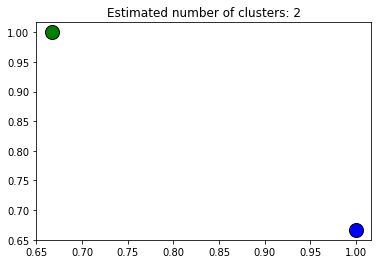

Labels:
[0 1 1 1 1]
Method Invocation: imageio.imread

Similarity Matrix: 
          0         1         2
0  1.000000  0.666667  0.666667
1  0.666667  1.000000  1.000000
2  0.666667  1.000000  1.000000



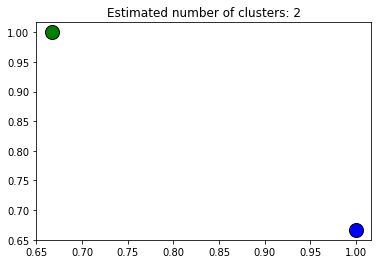

Labels:
[0 1 1]
Method Invocation: imageio.mimsave

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: imageio.mimwrite

Similarity Matrix: 
     0    1    2    3
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0



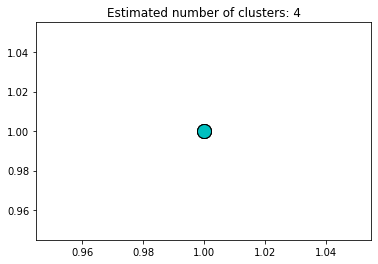

Labels:
[0 1 2 3]


In [9]:
from pandas import *

for key in usage_pattern_dict:
    print("=================================================")
    print("Method Invocation: " + key)
    print()

    target_usage_pattern_list = usage_pattern_dict[key]

    if len(target_usage_pattern_list) == 1:
        print("Method Invocation contains only 1 usage pattern.")
        print("No clusters are generated. ")
    else:
        similarity_matrix = utils.generate_similarity_matrix(target_usage_pattern_list)
        print("Similarity Matrix: ")
        print(DataFrame(similarity_matrix))
        print()
        utils.generate_clusters(similarity_matrix, True)